In [1]:
from pdf2image import convert_from_path

pages = convert_from_path(r'docs\patient_details\pd_2.pdf',poppler_path=r'C:\poppler-23.11.0\Library\bin')

In [2]:
pages

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1500x2000>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1992x2000>]

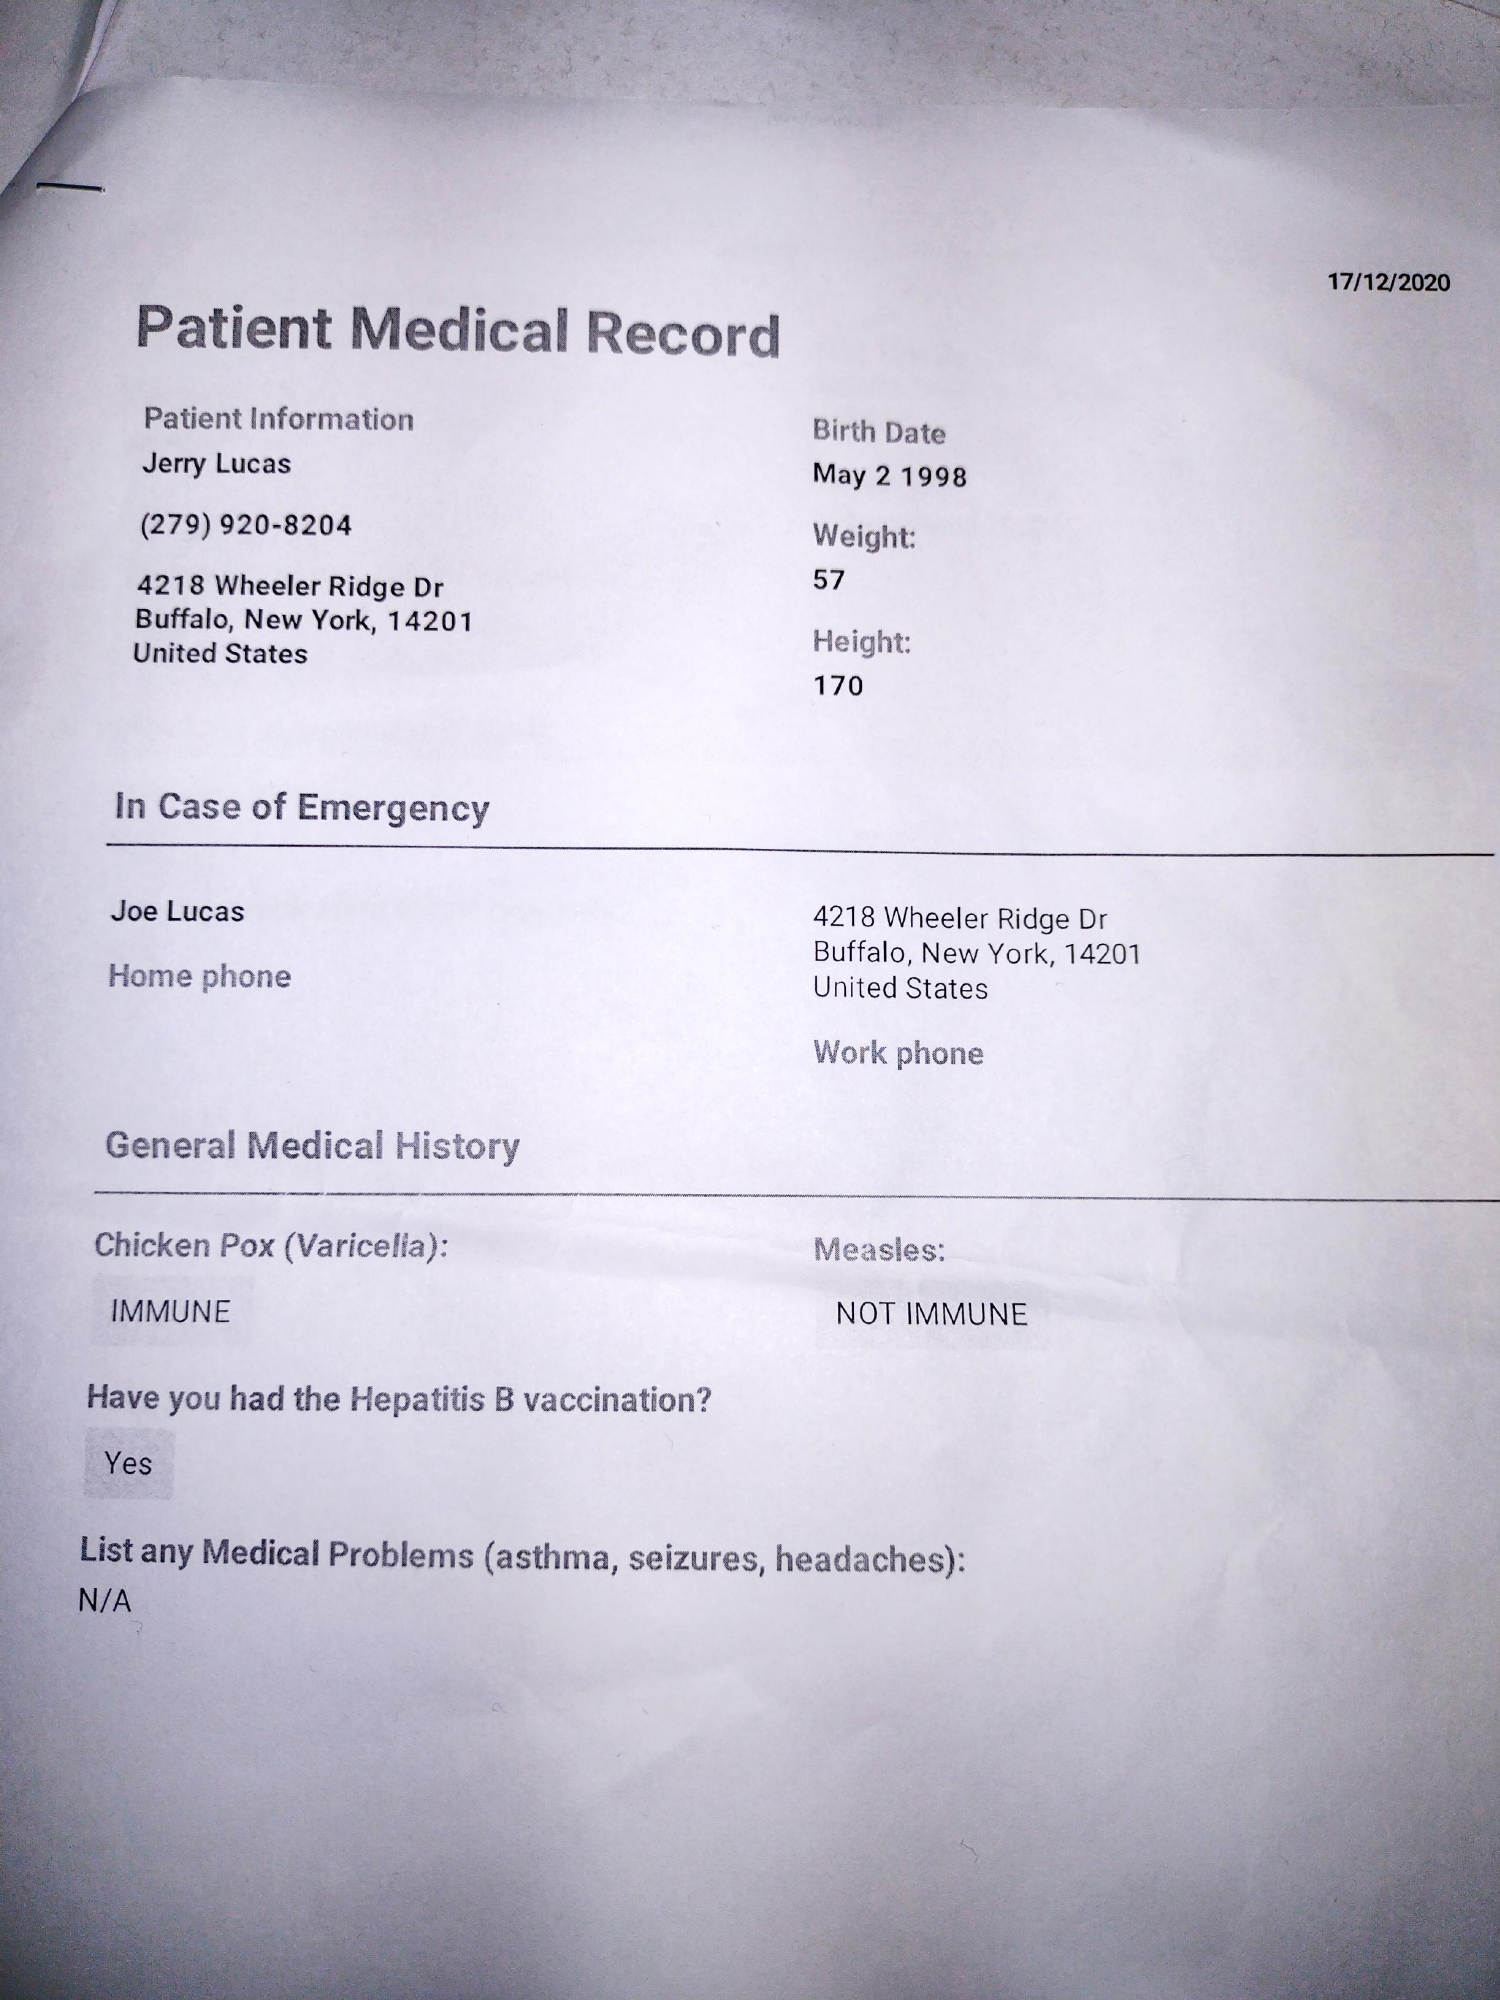

In [3]:
pages[0]

In [5]:
import pytesseract 

pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(pages[0],lang='eng')
print(text)

a

Patient Medical Record

Patient Information
Jerry Lucas

(279) 920-8204
4218 Wheeler Ridge Dr

Buffalo, New York, 14201
United States

In Case of Emergency

 

 

Birth Date
May 2 1998

Weight:
57

Height:
170

 

Joe Lucas

Home phone

General Medical History

4218 Wheeler Ridge Dr
Buffalo, New York, 14201
United States

Work phone

 

Chicken Pox (Varicelia):

IMMUNE

Have you had the Hepatitis B vaccination?

Measles:

NOT IMMUNE

any Medical Problems (asthma, seizures, headaches):

 



In [9]:
import numpy as np
import cv2
from PIL import Image

def preprocess_image(img):
    gray = cv2.cvtColor(np.array(img),cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray,None,fx=1.5,fy=1.5,interpolation=cv2.INTER_LINEAR)
    processed_image = cv2.adaptiveThreshold(
        resized,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        61,
        11
    )
    return processed_image

In [10]:
img = preprocess_image(pages[0])
Image.fromarray(img).show()

In [11]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(img,lang='eng')
print(text)

 

Patient Medical Record

Patient Information Birth Date

Jerry Lucas May 2 1998

(279) 920-8204 Weight:

4218 Wheeler Ridge Dr 57

Buffalo, New York, 14201 Height:

United States gnt
170

In Case of Emergency

eee

Joe Lucas . 4218 Wheeler Ridge Dr
Buffalo, New York, 14201
Home phone United States
Work phone

General Medical History

 

Chicken Pox (Varicelia): Measles: ..

IMMUNE NOT IMMUNE

Have you had the Hepatitis B vaccination?

‘Yes

| List any Medical Problems (asthma, seizures, headaches):
N/A

7?
v

 

 

17/12/2020

 



# Extract Name

In [12]:
import re

pattern = 'Patient Information(.*?)\(\d{3}\)'

matches = re.findall(pattern,text,flags = re.DOTALL)
matches[0].strip()

'Birth Date\n\nJerry Lucas May 2 1998'

In [13]:
match = matches[0].replace("Birth Date","").strip()
match

'Jerry Lucas May 2 1998'

In [14]:
pattern = '((Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[ \d]+)'

date_matches = re.findall(pattern,text)
date = date_matches[0][0]
date

'May 2 1998'

In [20]:
match.replace(date,'').strip()

'Jerry Lucas'

In [25]:
def remove_noise_from_name(name):
    name = name.replace("Birth Date","").strip()
    date_pattern = '((Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[ \d]+)'
    date_matches = re.findall(date_pattern,name)
    
    if date_matches:
        date = date_matches[0][0]
        name = name.replace(date,'').strip()
    
    return name

In [26]:
name = 'Birth Date\n\nKathy Crawford May 6 1972'

name = remove_noise_from_name(name)
name

'Kathy Crawford'

# Extract Phone

# Extract Vaccine

# Extract Medical Problems

# Extract Name

In [11]:
# Extract Name